In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# ***Generators***

In [22]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/prodi/PRODIGY_ML_03-my-new-branch/PRODIGY_ML_03-my-new-branch/catsAndDogs40/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/prodi/PRODIGY_ML_03-my-new-branch/PRODIGY_ML_03-my-new-branch/catsAndDogs40/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 64 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


# ***Normalized***

In [23]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# ***Create CNN Model***

In [24]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

# ***Trainning the CNN***

In [26]:
model.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [27]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
2/2 [==============================] - 7s 3s/step - loss: 4.3829 - accuracy: 0.5938 - val_loss: 1.4027 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 4.5307 - accuracy: 0.7656 - val_loss: 1.1478 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 4s 2s/step - loss: 1.6364 - accuracy: 0.9062 - val_loss: 0.9667 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 2.2825 - accuracy: 0.8750 - val_loss: 0.8851 - val_accuracy: 0.5625
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 0.3496 - accuracy: 0.9375 - val_loss: 1.2946 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss: 1.0114 - accuracy: 0.9219 - val_loss: 0.9482 - val_accuracy: 0.6250
Epoch 7/10
2/2 [==============================] - 4s 2s/step - loss: 0.4518 - accuracy: 0.9688 - val_loss: 0.8678 - val_accuracy: 0.5625
Epoch 8/10
2/2 [=========================

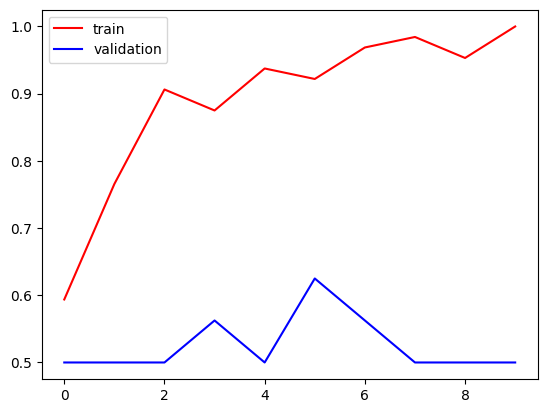

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

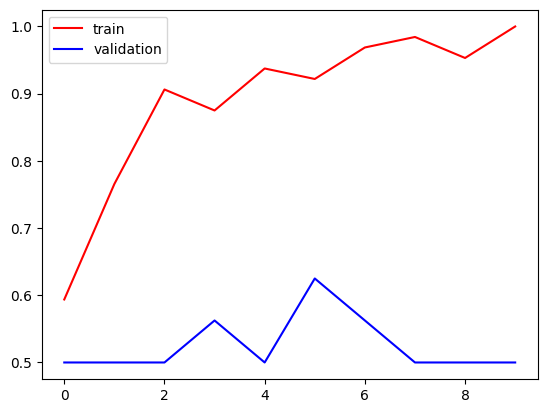

In [29]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

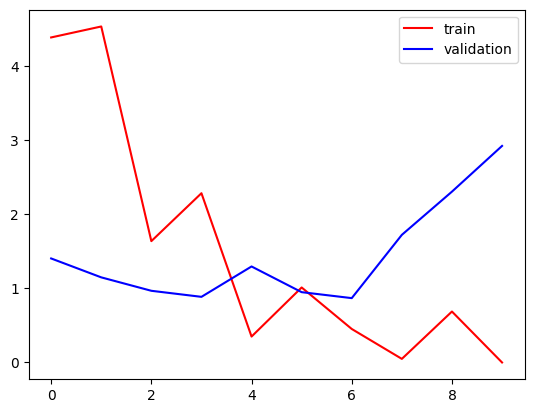

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

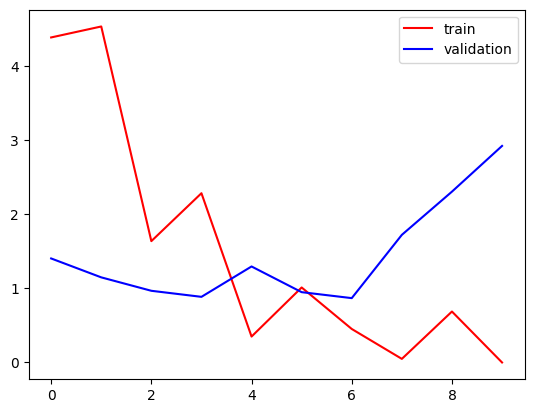

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [32]:
import cv2

In [33]:
test_img = cv2.imread('D:/prodi/PRODIGY_ML_03-my-new-branch/PRODIGY_ML_03-my-new-branch/catsAndDogs40/test/cat/5.jpg')

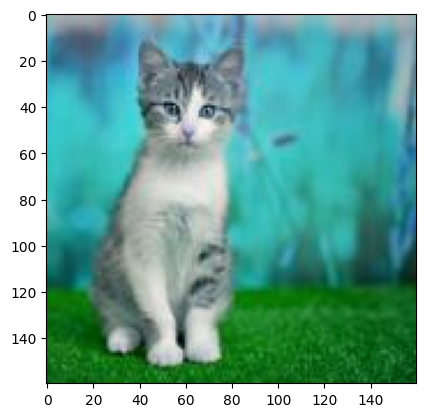

In [34]:
plt.imshow(test_img)

In [35]:
test_img.shape

(160, 160, 3)

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
result=model.predict(test_input)

1/1 [==============================] - 0s 148ms/step


In [39]:
result

array([[-248.90591]], dtype=float32)

In [40]:
if result[0]<0:
  print("The image classified is a cat")
else:
  print("This image classified is a dog")

The image classified is a cat
